In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Raw IMBD dataset
Downloadable Link : http://mng.bz/0tIo

In [37]:
import os
os.listdir("/content/drive/My Drive/ML and AI/Datasets") # datasets save in my google drive

['cat vs dog',
 'compresive_strength_concrete',
 'Mnist_fashion_dataset',
 'Boston Housing dataset',
 'sonar dataset',
 'Iris dataset',
 'diabetes dataset',
 'bbc dataset',
 'IMDB dataset',
 'jena_climate',
 'Amazon_Reviews']

In [38]:
os.listdir("/content/drive/My Drive/ML and AI/Datasets/IMDB dataset")

['IMDB Dataset.csv']

In [39]:
import pandas as pd
import tensorflow as tf

df = pd.read_csv('/content/drive/My Drive/ML and AI/Datasets/IMDB dataset/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [41]:
labels = df["sentiment"]
features = df["review"]

In [42]:
#Encoding Labels
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

[1 1 1 ... 0 0 0]


In [43]:
# Tokenizing the text
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000
tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(features)
features = tokenizer.texts_to_sequences(features)
#print(features)

In [44]:
#Training & testing Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=1)

# LSTM Using Reverse Seqence

In [45]:
# Reverses sequences ?
R_x_train = [x[::-1] for x in x_train]
R_x_test = [x[::-1] for x in x_test]

In [46]:
# pad_sequences is used to ensure that all sequences in a list have the same length.

maxlen = 20            # 20 word ka sentence hoga max

from tensorflow.keras import preprocessing
R_x_train = preprocessing.sequence.pad_sequences(R_x_train, maxlen=maxlen)
R_x_test = preprocessing.sequence.pad_sequences(R_x_test, maxlen=maxlen)

In [49]:
# padding to enshoure all the sentence are of same length
# NORMAL SEQUENCE

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)      

#LSTM Using Reverse Seqence

In [50]:
max_features = 10000
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

#model.summary()

In [51]:
history = model.fit(R_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 4s 18ms/step - loss: 0.5778 - acc: 0.6865 - val_loss: 0.5401 - val_acc: 0.7200
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 0.4817 - acc: 0.7659 - val_loss: 0.5319 - val_acc: 0.7259
Epoch 3/10
250/250 [==============================] - 4s 14ms/step - loss: 0.4445 - acc: 0.7900 - val_loss: 0.5458 - val_acc: 0.7272
Epoch 4/10
250/250 [==============================] - 4s 14ms/step - loss: 0.4144 - acc: 0.8072 - val_loss: 0.5527 - val_acc: 0.7253
Epoch 5/10
250/250 [==============================] - 4s 14ms/step - loss: 0.3843 - acc: 0.8238 - val_loss: 0.5702 - val_acc: 0.7269
Epoch 6/10
250/250 [==============================] - 3s 14ms/step - loss: 0.3552 - acc: 0.8393 - val_loss: 0.5951 - val_acc: 0.7196
Epoch 7/10
250/250 [==============================] - 4s 14ms/step - loss: 0.3274 - acc: 0.8566 - val_loss: 0.6233 - val_acc: 0.7147
Epoch 8/10
250/250 [==============================] - 3s 14ms/step - 

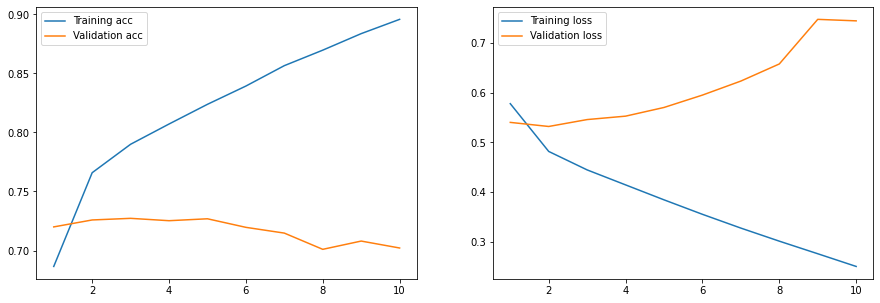

In [52]:
import matplotlib.pyplot as plt
def show_all(history):
    def show(history,acc,val_acc,label):
        epochs = range(1, len(history.history[acc])+1)
        plt.plot(epochs,history.history[acc],label='Training '+label)
        plt.plot(epochs,history.history[val_acc],label='Validation '+label)
        plt.legend()
        
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    show(history,'acc','val_acc','acc')
    plt.subplot(122)
    show(history,'loss','val_loss','loss')
show_all(history)

In [54]:
evaluation = model.evaluate(R_x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

313/313 - 1s - loss: 0.7276 - acc: 0.7041

Loss:  72.75513410568237 %
Accuracy:  70.41000127792358 %


#Training and evaluating a bidirectional LSTM

In [55]:
# pad_sequences is used to ensure that all sequences in a list have the same length.

maxlen = 20            # 20 word ka sentence hoga max

from tensorflow.keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [56]:
# Bidirectional LSTM

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [57]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 5s 19ms/step - loss: 0.5256 - acc: 0.7273 - val_loss: 0.4830 - val_acc: 0.7635
Epoch 2/10
250/250 [==============================] - 4s 15ms/step - loss: 0.4211 - acc: 0.8075 - val_loss: 0.4708 - val_acc: 0.7720
Epoch 3/10
250/250 [==============================] - 4s 15ms/step - loss: 0.3879 - acc: 0.8258 - val_loss: 0.4664 - val_acc: 0.7770
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3619 - acc: 0.8397 - val_loss: 0.4727 - val_acc: 0.7753
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.3389 - acc: 0.8523 - val_loss: 0.4968 - val_acc: 0.7764
Epoch 6/10
250/250 [==============================] - 4s 15ms/step - loss: 0.3179 - acc: 0.8625 - val_loss: 0.5241 - val_acc: 0.7736
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 0.2990 - acc: 0.8710 - val_loss: 0.5276 - val_acc: 0.7682
Epoch 8/10
250/250 [==============================] - 4s 15ms/step - 

In [58]:
#show_all(history)

In [59]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

313/313 - 2s - loss: 0.6109 - acc: 0.7581

Loss:  61.08575463294983 %
Accuracy:  75.80999732017517 %


#Training a bidirectional GRU

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [61]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])

In [62]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 5s 19ms/step - loss: 0.5401 - acc: 0.7137 - val_loss: 0.4766 - val_acc: 0.7716
Epoch 2/10
250/250 [==============================] - 4s 16ms/step - loss: 0.4258 - acc: 0.8046 - val_loss: 0.4738 - val_acc: 0.7735
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3986 - acc: 0.8196 - val_loss: 0.4746 - val_acc: 0.7742
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3821 - acc: 0.8303 - val_loss: 0.4663 - val_acc: 0.7761
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3693 - acc: 0.8369 - val_loss: 0.4693 - val_acc: 0.7766
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3593 - acc: 0.8419 - val_loss: 0.4701 - val_acc: 0.7710
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.3458 - acc: 0.8478 - val_loss: 0.4819 - val_acc: 0.7746
Epoch 8/10
250/250 [==============================] - 4s 16ms/step - 

In [63]:
#show_all(history)

In [64]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

313/313 - 2s - loss: 0.5031 - acc: 0.7665

Loss:  50.30665993690491 %
Accuracy:  76.64999961853027 %
